In [21]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters

with h5py.File('train.h5', 'r') as f:
    X = f['x'][:]
    Y = f['y'][:]

print(X.shape)
print(Y.shape)

# Convierte X a un DataFrame de pandas
df_X = pd.DataFrame(X.reshape(-1, X.shape[-1]))

# Convierte Y a un DataFrame de pandas
df_Y = pd.DataFrame(Y, columns=['Target'])
print(df_Y)
print(Y.shape)
print(df_Y.shape)
# Une los dos DataFrames
df = pd.concat([df_X, df_Y], axis=1)

#print(df)

num_trials = 18530

df_tsfresh = pd.DataFrame({
    'id': np.repeat(df.index, num_trials),
    'time': np.tile(np.arange(num_trials), len(df)),
    'value': df.drop(columns='Target').values.flatten()
})
print("df_tsfresh")
print(df_tsfresh)

#print quantity of zeros and ones
print(df_Y['Target'].value_counts())

(204, 1, 18530)
(204,)
     Target
0         0
1         1
2         0
3         0
4         0
..      ...
199       0
200       0
201       0
202       0
203       1

[204 rows x 1 columns]
(204,)
(204, 1)
df_tsfresh
          id   time     value
0          0      0 -0.005859
1          0      1 -0.011414
2          0      2 -0.010773
3          0      3 -0.010559
4          0      4 -0.008850
...      ...    ...       ...
3780115  203  18525  0.015320
3780116  203  18526  0.007477
3780117  203  18527 -0.000061
3780118  203  18528 -0.009552
3780119  203  18529 -0.019318

[3780120 rows x 3 columns]
Target
0    149
1     55
Name: count, dtype: int64


FASE DE FEATURES 

In [3]:
from tsfresh.utilities.distribution import MultiprocessingDistributor
import os
num_cores = os.cpu_count()
Distributor = MultiprocessingDistributor(n_workers=num_cores , disable_progressbar=False ,
                                         progressbar_title="Extraccion de features")



features = extract_features(df_tsfresh, column_id='id', column_sort='time', distributor=Distributor, default_fc_parameters=EfficientFCParameters())
print(features)

Extraccion de features: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]


     value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
..                                              ...                       ...   
199                                             0.0                       0.0   
200                                             0.0                       0.0   
201                                             0.0                       0.0   
202                                             0.0                       0.0   
203                                             0.0                       0.0   

     value__has_duplicate_m

In [41]:
#features.to_csv("data_medicina.csv")
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
import pandas as pd
import os
features = pd.read_csv('./data_medicina.csv')       # feautures es mi nuevo dataframe con las features
features = features.iloc[:,1:]   
num_cores = os.cpu_count()


features_imputed = impute(features)     # imputa los valores faltantes

print(features_imputed.shape)
# Selecciona las features mas relevantes
features = select_features(features_imputed , Y  , n_jobs = num_cores)


x_sin_pca = features
y_train = df_Y['Target']
print(x_sin_pca.shape)
print(y_train.shape)





c:\Users\Jesus Egusquiza\Desktop\ciclo5\Machine Learning\proyecto2_2\env\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


(204, 777)
(204, 208)
(204,)



#PCA ANALYSIS






data scaled
[[-0.86723252  0.6243149  -0.79018102 ...  0.03354261 -0.25848713
   0.67522709]
 [-1.23886794  0.1983439  -0.99755834 ... -0.26727137  0.14080416
   1.22738112]
 [ 1.27418926  0.19491055  1.12539521 ... -0.02826451 -0.34941294
  -0.44781568]
 ...
 [-0.92833255 -0.92859496 -0.82050893 ...  0.01175625  0.0555435
   2.05375231]
 [ 1.04899794  0.00415125  0.77293574 ... -0.04943011 -0.35246599
  -0.83031547]
 [-1.42803659 -2.39407625 -1.09509945 ... -0.41962932  0.29277394
   1.56194284]]
max 13.641396742419687
min -12.42112104060243


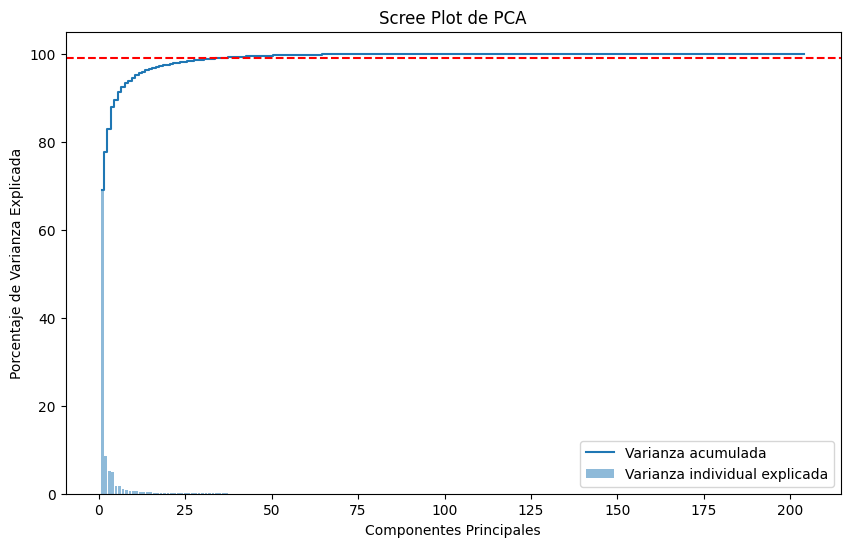

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)
print("data scaled")
print(data_scaled)
print("max", np.max(data_scaled))
print("min", np.min(data_scaled))
x_train_scaled = data_scaled

# Ajustar el PCA
pca = PCA()
pca.fit(x_train_scaled)


# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100

# Número de componentes
num_componentes = np.arange(len(varianza_explicada)) + 1

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.bar(num_componentes, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(num_componentes, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Scree Plot de PCA')
plt.legend(loc='best')
plt.axhline(y=99, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
plt.show()


APLICANDO PCA CON LA DATA MAS RELEVANTE

In [135]:

# Seleccionar el número de componentes principales
pca2 = PCA(n_components=50)
pca2.fit(x_train_scaled)

eigen_vecs = pca2.components_
#print(eigen_vecs.shape)

# Transformar los datos al nuevo espacio
features_transformed = pca2.transform(x_train_scaled)      # features_transformed es un numpy array
features_imputed = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

# DATA CON PCA
X = features_imputed
Y = df_Y['Target']
print(X.shape)
print(Y.shape)

(204, 50)
(204,)


ENTRENANDO CON DECISION TREE

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from modelos import Dt
import random
#x = pd.DataFrame(features_transformed)
#y = df_Y['Target']



# Divide tus datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)       # entrando con data pca

# entrenando con data original
# X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state=42)     



#clf = Dt.DT(X_train , y_train)
# Entrena el clasificador
# clf.fit(X_train, y_train)
#clf.create_DT()


# Haz predicciones en el conjunto de prueba
# y_pred = clf.predict(X_test)

# Imprime un informe de clasificación

#accuracy , y_pred =clf.validation_test(X_test , y_test)

#print("Accuracy LO NUESTRO ES BUENO :3 : " , accuracy)
# EXPERIMIENTACION CON 100 EXECUTIONS
accuracy_x = []

for i in range(100):
    a = random.randint(0, 1000)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = a)
    
    #clf = DecisionTreeClassifier()
    clf = Dt.DT(X_train , y_train)
    # Entrena el clasificador
    #clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    clf.create_DT()
    accuracy , y_pred =clf.validation_test(X_test , y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : " , accuracy)
    accuracy_x.append(accuracy)
# sacando promedio
accuracy_x = np.array(accuracy_x)
accuracy_x = np.mean(accuracy_x)
print("Accuracy_x: " , accuracy_x)

#accuracy = classification_report(y_test, y_pred)

'''
#get accuracy

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy_firme_PA LOS GAYS: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

Accuracy :  0.5806451612903226
Accuracy :  0.7258064516129032
Accuracy :  0.6774193548387096
Accuracy :  0.7258064516129032
Accuracy :  0.6612903225806451
Accuracy :  0.6774193548387096
Accuracy :  0.7580645161290323
Accuracy :  0.7258064516129032
Accuracy :  0.7096774193548387
Accuracy :  0.6290322580645161
Accuracy :  0.6774193548387096
Accuracy :  0.6451612903225806
Accuracy :  0.6290322580645161
Accuracy :  0.7096774193548387
Accuracy :  0.7419354838709677
Accuracy :  0.6774193548387096
Accuracy :  0.6774193548387096
Accuracy :  0.7096774193548387
Accuracy :  0.6774193548387096
Accuracy :  0.7258064516129032
Accuracy :  0.7258064516129032
Accuracy :  0.6290322580645161
Accuracy :  0.7741935483870968
Accuracy :  0.6290322580645161
Accuracy :  0.7419354838709677
Accuracy :  0.6612903225806451
Accuracy :  0.6451612903225806
Accuracy :  0.6612903225806451
Accuracy :  0.7580645161290323
Accuracy :  0.7258064516129032
Accuracy :  0.7903225806451613
Accuracy :  0.6935483870967742
Accuracy

'\n#get accuracy\n\naccuracy_f = accuracy_score(y_test, y_pred)\nprint("Accuracy_firme_PA LOS GAYS: " , accuracy_f)\n\n#create confusion matrix\nfrom sklearn.metrics import confusion_matrix\n\n#plot confusion matrix\nimport seaborn as sns\nsns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.show()\n'

ENTRENANDO CON RANDOM FOREST

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from modelos import Dt
import random

# EXPERIMIENTACION CON 100 EXECUTIONS
accuracy_x = []

for i in range(200):
    a = random.randint(0, 1500)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = a)      # entrando con data pca
    X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state = a)      # entrando con data SIN pca

    clf = RandomForestClassifier(n_estimators=100, max_depth=3)
    #clf = Dt.DT(X_train , y_train)
    #clf.create_DT()
    clf.fit(X_train, y_train)
    #accuracy , y_pred =clf.validation_test(X_test , y_test)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : " , accuracy)
    accuracy_x.append(accuracy)
# sacando promedio
accuracy_x = np.array(accuracy_x)
accuracy_x = np.mean(accuracy_x)
print("Accuracy_x: " , accuracy_x)

#accuracy = classification_report(y_test, y_pred)

'''
#get accuracy

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy_firme_PA LOS GAYS: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

Accuracy :  0.7419354838709677
Accuracy :  0.8225806451612904
Accuracy :  0.8225806451612904
Accuracy :  0.7903225806451613
Accuracy :  0.7903225806451613
Accuracy :  0.6935483870967742
Accuracy :  0.7903225806451613
Accuracy :  0.7903225806451613
Accuracy :  0.8225806451612904
Accuracy :  0.6612903225806451
Accuracy :  0.7741935483870968
Accuracy :  0.7096774193548387
Accuracy :  0.8064516129032258
Accuracy :  0.8387096774193549
Accuracy :  0.7741935483870968
Accuracy :  0.8709677419354839
Accuracy :  0.7580645161290323
Accuracy :  0.7741935483870968
Accuracy :  0.7741935483870968
Accuracy :  0.7258064516129032
Accuracy :  0.7096774193548387
Accuracy :  0.7741935483870968
Accuracy :  0.7903225806451613
Accuracy :  0.7741935483870968
Accuracy :  0.6774193548387096
Accuracy :  0.8064516129032258
Accuracy :  0.7580645161290323
Accuracy :  0.8064516129032258
Accuracy :  0.7580645161290323
Accuracy :  0.7258064516129032
Accuracy :  0.8870967741935484
Accuracy :  0.8387096774193549
Accuracy

'\n#get accuracy\n\naccuracy_f = accuracy_score(y_test, y_pred)\nprint("Accuracy_firme_PA LOS GAYS: " , accuracy_f)\n\n#create confusion matrix\nfrom sklearn.metrics import confusion_matrix\n\n#plot confusion matrix\nimport seaborn as sns\nsns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.show()\n'

ENTRENANDO CON Regresion Logistica

Accuracy:  0.7419354838709677


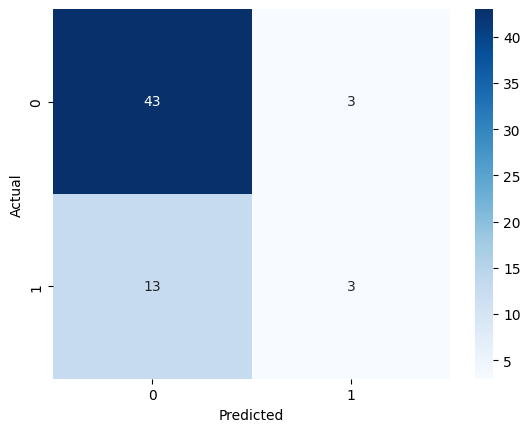

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from modelos import RL

#X = pd.DataFrame(features_transformed)

# normalizando los datos de PCA
X_rl = RL.norm_data(X)
# normalizando los datos originales
#X_rl = RL.norm_data(x_sin_pca)
# hacer que X_rl sea un numpy array


# maximo valor de x_sin_pca

X_train, X_test, y_train, y_test = train_test_split(X_rl, Y, test_size=0.3, random_state=42)   # entrando con data pca

#X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state=42)      # entrando con data original

LR = RL.modelo(alpha=0.02 ,epochs=20000 , epsilon=0.0001 )
LR.train(X_train , y_train)


y_pred = LR.predict(X_test)

#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


REGRESION LOGISTICA 100 EXPERIMENTOS

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from modelos import RL

#X = pd.DataFrame(features_transformed)

# normalizando los datos de PCA
X_rl = RL.norm_data(X)
# normalizando los datos originales
#X_rl = RL.norm_data(x_sin_pca)
# hacer que X_rl sea un numpy array


# EXPERIMIENTACION CON 200 EXECUTIONS
accuracy_x = []

for i in range(100):
    a = random.randint(0, 1500)
    X_train, X_test, y_train, y_test = train_test_split(X_rl, Y, test_size=0.3, random_state=a)   # entrando con data pca
    # X_train, X_test, y_train, y_test = train_test_split(x_sin_pca.to_numpy(), Y, test_size=0.3, random_state = a)      # entrando con data SIN pca
    LR = RL.modelo(alpha=0.02 ,epochs=20000 , epsilon=0.00001 )
    LR.train(X_train , y_train)
    y_pred = LR.predict(X_test)
    # Hacer predicciones
    #accuracy , y_pred =clf.validation_test(X_test , y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : " , accuracy)
    accuracy_x.append(accuracy)
# sacando promedio
accuracy_x = np.array(accuracy_x)
accuracy_x = np.mean(accuracy_x)
print("Accuracy_mean: " , accuracy_x)


Accuracy :  0.7258064516129032
Accuracy :  0.7419354838709677
Accuracy :  0.6774193548387096
Accuracy :  0.6612903225806451
Accuracy :  0.7903225806451613
Accuracy :  0.7580645161290323
Accuracy :  0.7419354838709677
Accuracy :  0.8225806451612904
Accuracy :  0.7580645161290323
Accuracy :  0.7419354838709677
Accuracy :  0.7419354838709677
Accuracy :  0.7096774193548387
Accuracy :  0.7258064516129032
Accuracy :  0.7096774193548387
Accuracy :  0.7096774193548387
Accuracy :  0.7419354838709677
Accuracy :  0.6774193548387096
Accuracy :  0.6935483870967742
Accuracy :  0.8225806451612904
Accuracy :  0.7419354838709677
Accuracy :  0.7580645161290323
Accuracy :  0.7096774193548387
Accuracy :  0.7903225806451613
Accuracy :  0.7096774193548387
Accuracy :  0.6774193548387096
Accuracy :  0.7096774193548387
Accuracy :  0.6129032258064516
Accuracy :  0.6935483870967742
Accuracy :  0.7580645161290323
Accuracy :  0.6290322580645161
Accuracy :  0.7741935483870968
Accuracy :  0.6290322580645161
Accuracy

#SVM 

(142, 50)
(142,)
Accuracy:  0.25806451612903225


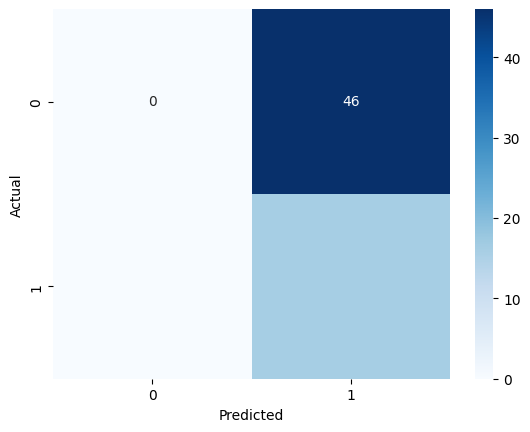

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from modelos import svm

#X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42) #for non PCA 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #for PCA processed data 

print(X_train.shape)
print(y_train.shape)
sv = svm.SVM()
sv.fit(X_train , y_train)

y_pred = sv.predict(X_test)


#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


(204, 208)
(204, 50)
Accuracy:  0.7258064516129032


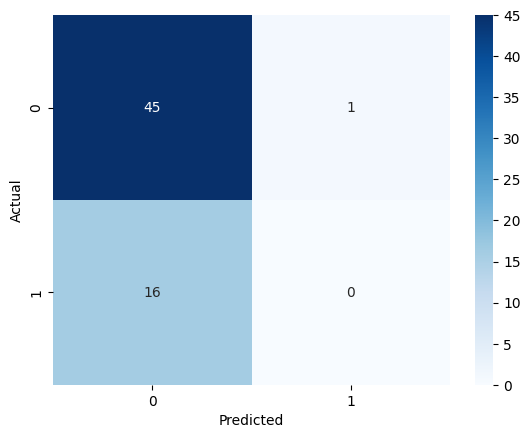

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from modelos import LDA


# convertir x_sin_pca a numpy array
print(x_sin_pca.shape)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(x_sin_pca.to_numpy(),Y , test_size=0.3, random_state=42)  #for non PCA 
#X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y, test_size=0.3, random_state=42)            #for PCA processed data 


ld = LDA.LDA(X_train , y_train)
ld.solution()

y_pred = ld.predict(X_test=X_test)


#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LDA CON 200 EXPERIMENTOS

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from modelos import LDA

# EXPERIMIENTACION CON 200 EXECUTIONS
accuracy_x = []

for i in range(200):
    a = random.randint(0, 1500)
    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y, test_size=0.3, random_state = a)      # entrando con data pca
    # X_train, X_test, y_train, y_test = train_test_split(x_sin_pca.to_numpy(), Y, test_size=0.3, random_state = a)      # entrando con data SIN pca
    ld = LDA.LDA(X_train , y_train)
    ld.solution()

    y_pred = ld.predict(X_test=X_test)
    # Hacer predicciones
    #accuracy , y_pred =clf.validation_test(X_test , y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : " , accuracy)
    accuracy_x.append(accuracy)
# sacando promedio
accuracy_x = np.array(accuracy_x)
accuracy_x = np.mean(accuracy_x)
print("Accuracy_mean: " , accuracy_x)

Accuracy :  0.7903225806451613
Accuracy :  0.7258064516129032
Accuracy :  0.5645161290322581
Accuracy :  0.8064516129032258
Accuracy :  0.7741935483870968
Accuracy :  0.6451612903225806
Accuracy :  0.7580645161290323
Accuracy :  0.8548387096774194
Accuracy :  0.8548387096774194
Accuracy :  0.8225806451612904
Accuracy :  0.7258064516129032
Accuracy :  0.7419354838709677
Accuracy :  0.8225806451612904
Accuracy :  0.7419354838709677
Accuracy :  0.27419354838709675
Accuracy :  0.8548387096774194
Accuracy :  0.8064516129032258
Accuracy :  0.6935483870967742
Accuracy :  0.8225806451612904
Accuracy :  0.7903225806451613
Accuracy :  0.7741935483870968
Accuracy :  0.7419354838709677
Accuracy :  0.7580645161290323
Accuracy :  0.7903225806451613
Accuracy :  0.8064516129032258
Accuracy :  0.8387096774193549
Accuracy :  0.7419354838709677
Accuracy :  0.7741935483870968
Accuracy :  0.7096774193548387
Accuracy :  0.6935483870967742
Accuracy :  0.7741935483870968
Accuracy :  0.8225806451612904
Accurac

KNN NEIGHTBORS

Accuracy:  0.8064516129032258


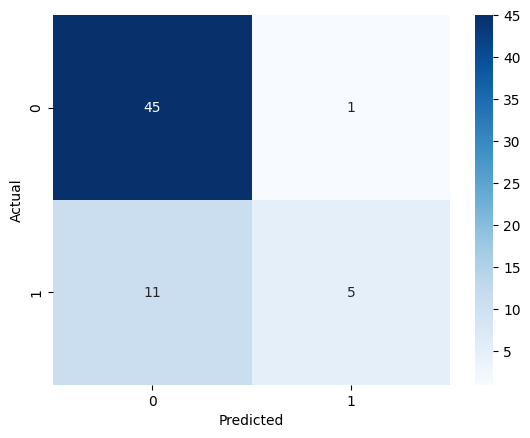

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state=42) #for non PCA 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #for PCA processed data 

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN ENTRENAMIENTO CON 100 EXPERIMENTOS

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# EXPERIMIENTACION CON 200 EXECUTIONS
accuracy_x = []

for i in range(200):
    a = random.randint(0, 1500)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = a)      # entrando con data pca
    #X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state = a)      # entrando con data SIN pca
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    # Hacer predicciones
    y_pred = knn.predict(X_test)
    #accuracy , y_pred =clf.validation_test(X_test , y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : " , accuracy)
    accuracy_x.append(accuracy)
# sacando promedio
accuracy_x = np.array(accuracy_x)
accuracy_x = np.mean(accuracy_x)
print("Accuracy_mean: " , accuracy_x)

Accuracy :  0.8225806451612904
Accuracy :  0.6935483870967742
Accuracy :  0.6774193548387096
Accuracy :  0.7258064516129032
Accuracy :  0.8064516129032258
Accuracy :  0.7741935483870968
Accuracy :  0.7903225806451613
Accuracy :  0.7741935483870968
Accuracy :  0.6774193548387096
Accuracy :  0.6935483870967742
Accuracy :  0.7903225806451613
Accuracy :  0.7258064516129032
Accuracy :  0.7419354838709677
Accuracy :  0.7419354838709677
Accuracy :  0.8064516129032258
Accuracy :  0.7741935483870968
Accuracy :  0.7096774193548387
Accuracy :  0.6774193548387096
Accuracy :  0.7419354838709677
Accuracy :  0.6290322580645161
Accuracy :  0.7741935483870968
Accuracy :  0.6612903225806451
Accuracy :  0.6612903225806451
Accuracy :  0.7096774193548387
Accuracy :  0.7419354838709677
Accuracy :  0.6129032258064516
Accuracy :  0.7580645161290323
Accuracy :  0.7741935483870968
Accuracy :  0.6935483870967742
Accuracy :  0.7741935483870968
Accuracy :  0.7903225806451613
Accuracy :  0.8387096774193549
Accuracy